In [ ]:
#Dataset taken from Kaggle : https://www.kaggle.com/datasets/yusufdelikkaya/online-sales-dataset?resource=download

In [ ]:
!pip install kaggle --quiet

import os
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)

!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

try:
    !kaggle datasets list | head -n 10
except Exception as e:
    print("Error in Kaggle setup:", e)


dataset = "yusufdelikkaya/online-sales-dataset"
try:
    print(f"Downloading dataset: {dataset}")
    !kaggle datasets download -d {dataset}
except Exception as e:
    print(f"Failed to download dataset {dataset}: {e}")

import zipfile

zip_file = "online-sales-dataset.zip"
if os.path.exists(zip_file):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall("online-sales-dataset")
        print(f"Dataset extracted to 'online-sales-dataset/'")
else:
    print(f"Zip file not found: {zip_file}")

import pandas as pd

csv_file = "online-sales-dataset/online_sales_dataset.csv"
if os.path.exists(csv_file):
    df = pd.read_csv(csv_file)
    print("Dataset loaded successfully. Displaying the first 5 rows:")
    print(df.head())
else:
    print(f"CSV file not found: {csv_file}")

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium


In [ ]:
print(df.isnull().sum())
df.dropna(inplace=True)

print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
df.dtypes

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID           4978
Country                 0
Discount                0
PaymentMethod           0
ShippingCost         2489
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
dtype: int64
0


,0
InvoiceNo,int64
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object
Discount,float64
PaymentMethod,object


In [ ]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44804 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          44804 non-null  int64  
 1   StockCode          44804 non-null  object 
 2   Description        44804 non-null  object 
 3   Quantity           44804 non-null  int64  
 4   InvoiceDate        44804 non-null  object 
 5   UnitPrice          44804 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            44804 non-null  object 
 8   Discount           44804 non-null  float64
 9   PaymentMethod      44804 non-null  object 
 10  ShippingCost       44804 non-null  float64
 11  Category           44804 non-null  object 
 12  SalesChannel       44804 non-null  object 
 13  ReturnStatus       44804 non-null  object 
 14  ShipmentProvider   44804 non-null  object 
 15  WarehouseLocation  44804 non-null  object 
 16  OrderPriority      44804 no

# Total Revenue over Time using a Line Graph

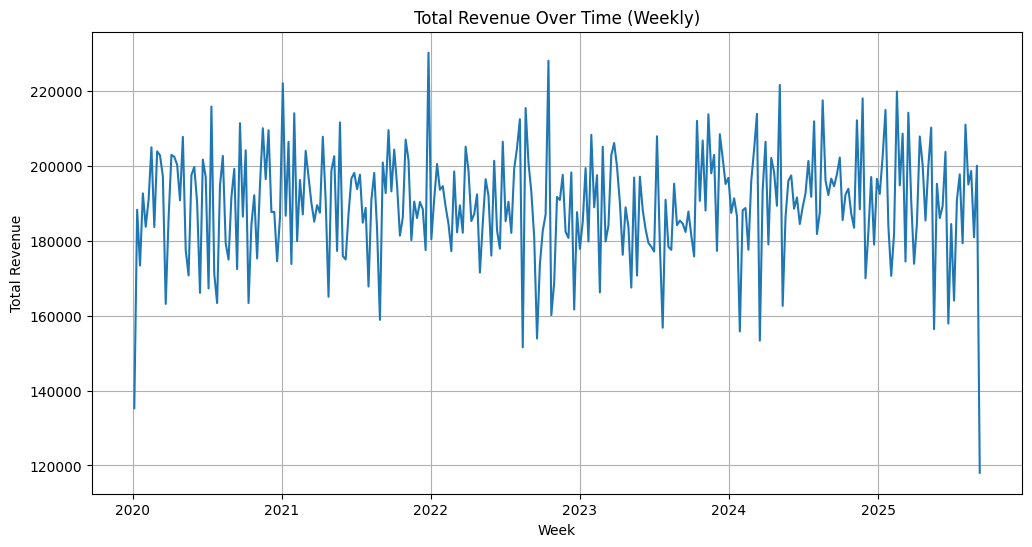

<ipython-input-42-24e72d711da3>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['TotalRevenue'].sum()


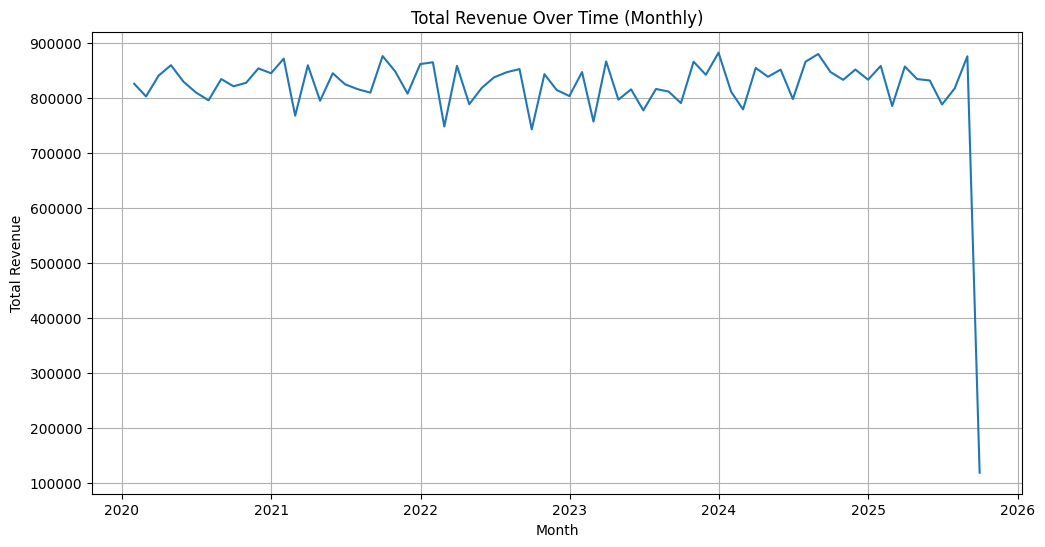

In [ ]:
import matplotlib.pyplot as plt
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']
weekly_revenue = df.groupby(pd.Grouper(key='InvoiceDate', freq='W'))['TotalRevenue'].sum()

plt.figure(figsize=(12, 6))
plt.plot(weekly_revenue.index, weekly_revenue.values)
plt.xlabel('Week')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Over Time (Weekly)')
plt.grid(True)
plt.show()

monthly_revenue = df.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['TotalRevenue'].sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values)
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Over Time (Monthly)')
plt.grid(True)
plt.show()

# Product Popularity using a Bar Chart

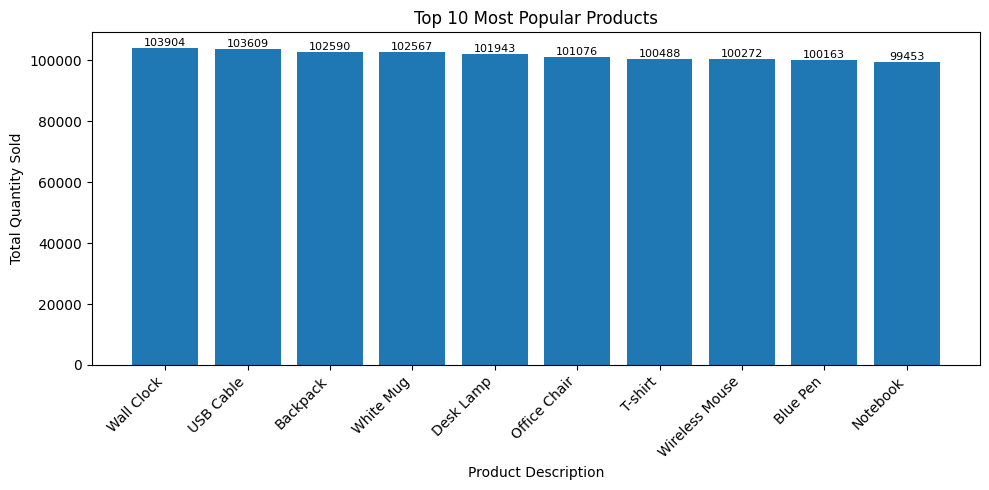

In [ ]:
product_popularity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.bar(product_popularity.index, product_popularity.values)
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Most Popular Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for i, v in enumerate(product_popularity.values):
   plt.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=8)

plt.show()

#  Shipping Costs Across Providers

<ipython-input-44-cb62be2bed6c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shipment_costs.index, y=shipment_costs.values, palette='flare')


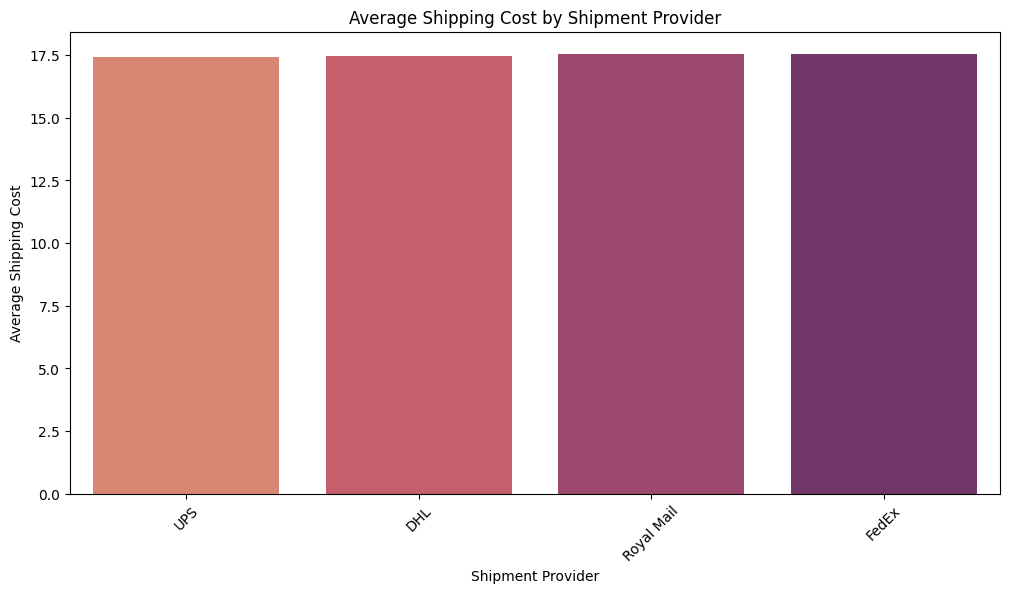

In [ ]:
import seaborn as sns
shipment_costs = df.groupby('ShipmentProvider')['ShippingCost'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=shipment_costs.index, y=shipment_costs.values, palette='flare')
plt.title('Average Shipping Cost by Shipment Provider')
plt.xlabel('Shipment Provider')
plt.ylabel('Average Shipping Cost')
plt.xticks(rotation=45)
plt.show()

# Order Priority Analysis

<ipython-input-45-8f21644f6640>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='OrderPriority', order=df['OrderPriority'].value_counts().index, palette='Set2')


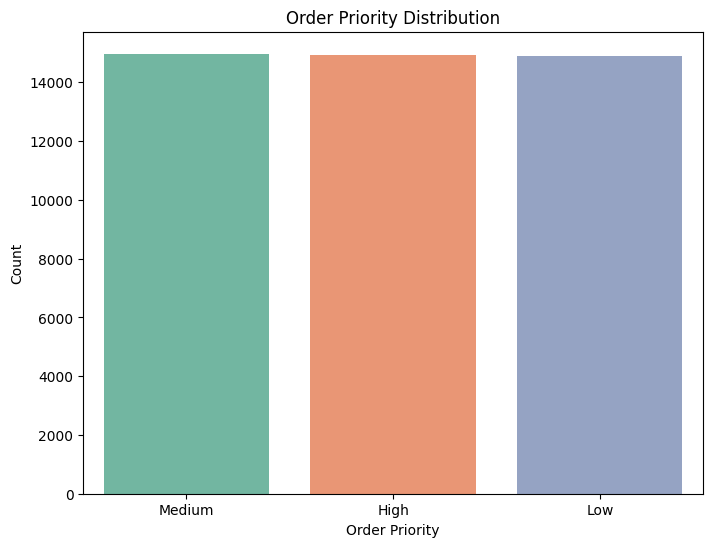

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='OrderPriority', order=df['OrderPriority'].value_counts().index, palette='Set2')
plt.title('Order Priority Distribution')
plt.xlabel('Order Priority')
plt.ylabel('Count')
plt.show()

# Return Status Analysis

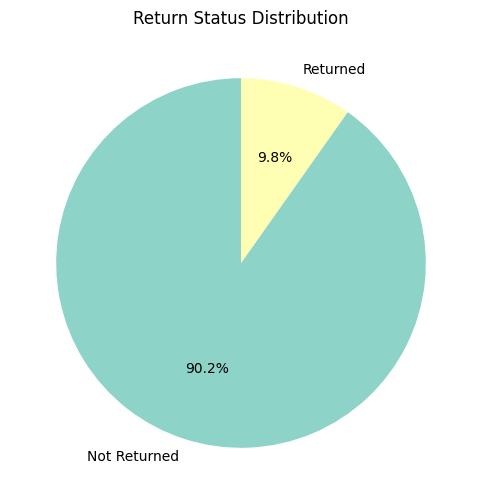

In [ ]:
return_status_counts = df['ReturnStatus'].value_counts()

plt.figure(figsize=(6, 6))
return_status_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3'), startangle=90)
plt.title('Return Status Distribution')
plt.ylabel('')
plt.show()

#Payment Method Distribution

<ipython-input-47-5a95089660c5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values, palette='muted')


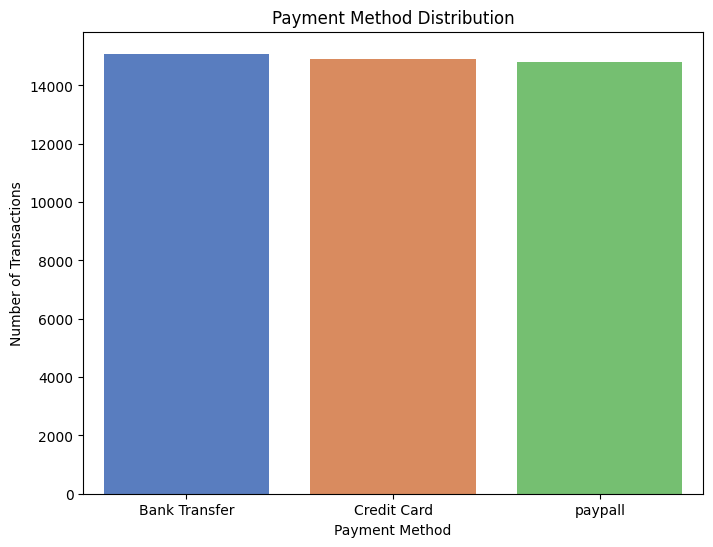

In [ ]:
plt.figure(figsize=(8, 6))
payment_method_counts = df['PaymentMethod'].value_counts()
sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values, palette='muted')
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.show()

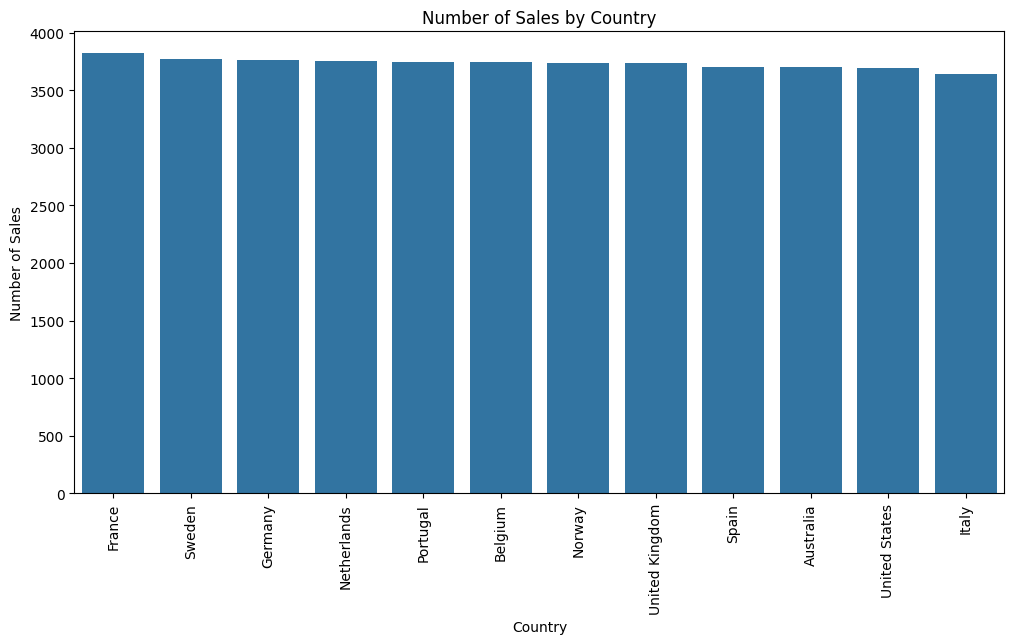

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Country', order=df['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Sales by Country')
plt.xlabel('Country')
plt.ylabel('Number of Sales')
plt.show()

#Top 10 Selling Product by Description

<ipython-input-49-640465e2e2a7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


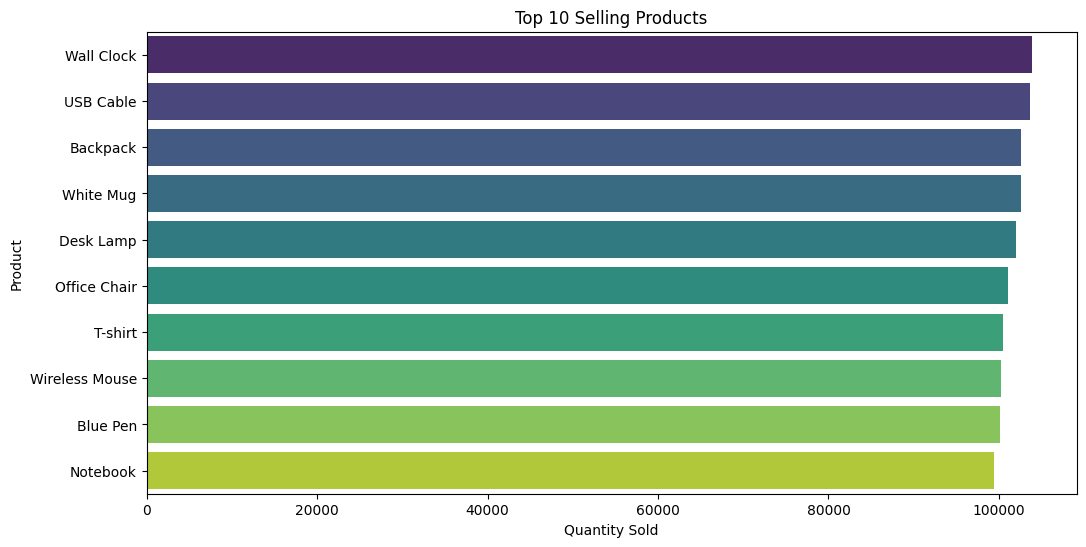

In [ ]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.show()

#Regression Analysis

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,TotalRevenue
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00:00,1.71,37039.0,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium,64.98
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00:00,41.25,19144.0,Spain,0.19,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium,742.50
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00:00,29.11,50472.0,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High,1426.39
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00:00,76.68,96586.0,Netherlands,0.14,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low,1073.52
5,744167,SKU_1006,Office Chair,47,2020-01-01 05:00:00,70.16,53887.0,Sweden,0.48,Credit Card,13.98,Electronics,Online,Not Returned,DHL,London,Medium,3297.52
